In [25]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from wordcloud import WordCloud, STOPWORDS 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
%matplotlib inline

## Read data

In [26]:
df = pd.read_csv('Fogo_de_Chao_review.csv')
df.head()

,Unnamed: 0,reviews,ratings,dine_in_time
0,0,"I would not recommend, except you are not hung...",2,"November 28, 2020"
1,1,The atmosphere is very different under COVID. ...,4,"November 27, 2020"
2,2,Meat is not good. Food doesn’t taste as good. ...,3,"November 26, 2020"
3,3,We love Fogo. The service and staff are always...,5,"November 26, 2020"
4,4,"Despite the recent reviews I saw on google, th...",3,"November 24, 2020"


In [27]:
df = df.drop('Unnamed: 0', axis = 1)
df.dtypes
df['dine_in_time'] = df['dine_in_time'].astype('datetime64')
df['year'] = pd.DatetimeIndex(df['dine_in_time']).year
df['month'] = pd.DatetimeIndex(df['dine_in_time']).month
df['day'] = pd.DatetimeIndex(df['dine_in_time']).day

In [28]:
df

,reviews,ratings,dine_in_time,year,month,day
0,"I would not recommend, except you are not hung...",2,2020-11-28,2020,11,28
1,The atmosphere is very different under COVID. ...,4,2020-11-27,2020,11,27
2,Meat is not good. Food doesn’t taste as good. ...,3,2020-11-26,2020,11,26
3,We love Fogo. The service and staff are always...,5,2020-11-26,2020,11,26
4,"Despite the recent reviews I saw on google, th...",3,2020-11-24,2020,11,24
...,...,...,...,...,...,...
2384,This was my first experience with a Brazilian ...,4,2012-12-18,2012,12,18
2385,Great place but the price of the menu is not w...,3,2012-12-17,2012,12,17
2386,"Disappointed with the service, have been to ma...",3,2012-12-15,2012,12,15
2387,Great salad bar. Very expensive for a lot of m...,2,2012-12-14,2012,12,14


## Exploratory visualizations

Text(0.5, 1.0, 'Num of Reviews Each Day')

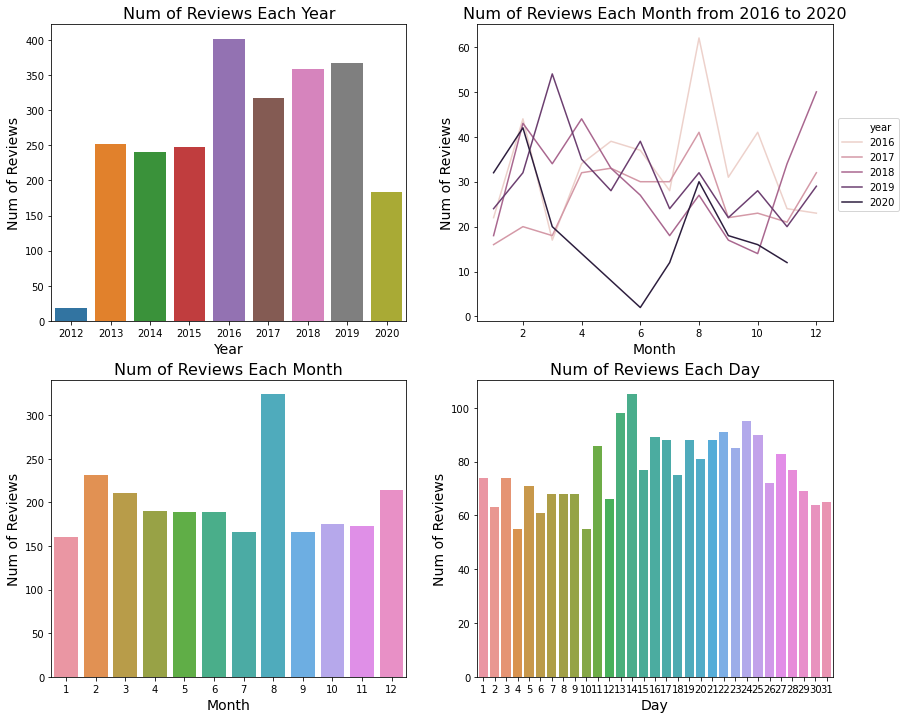

In [29]:
fig, ax = plt.subplots(figsize = [14,12], nrows = 2, ncols = 2)
sns.countplot(df['year'], ax = ax[0,0])
ax[0,0].set_xlabel('Year', fontsize = 14)
ax[0,0].set_ylabel('Num of Reviews', fontsize = 14)
ax[0,0].set_title('Num of Reviews Each Year', fontsize = 16)

df_1 = df.groupby(['year','month']).size().reset_index().rename({0:'num'}, axis = 1)
sns.lineplot(data = df_1.loc[df_1['year'].isin(['2016','2017','2018','2019','2020'])], x = 'month', y = 'num', hue = 'year', legend = 'full', ax = ax[0,1])
ax[0,1].set_xlabel('Month', fontsize = 14)
ax[0,1].set_ylabel('Num of Reviews', fontsize = 14)
ax[0,1].set_title('Num of Reviews Each Month from 2016 to 2020', fontsize = 16)
ax[0,1].legend(bbox_to_anchor=(1,0.7))

sns.countplot(df['month'], ax = ax[1,0])
ax[1,0].set_xlabel('Month', fontsize = 14)
ax[1,0].set_ylabel('Num of Reviews', fontsize = 14)
ax[1,0].set_title('Num of Reviews Each Month', fontsize = 16)

sns.countplot(df['day'], ax = ax[1,1])
ax[1,1].set_xlabel('Day', fontsize = 14)
ax[1,1].set_ylabel('Num of Reviews', fontsize = 14)
ax[1,1].set_title('Num of Reviews Each Day', fontsize = 16)



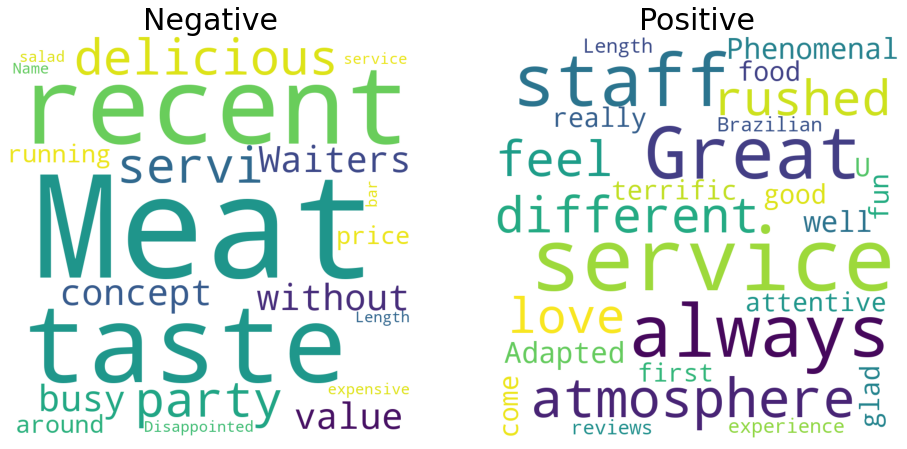

In [30]:
## Word Cloud
fig, ax = plt.subplots(figsize = [16,12], nrows = 1, ncols = 2)
df_low = df.loc[df['ratings'] <= 3]
df_high = df.loc[df['ratings'] > 3]
stopwords_1 = set(STOPWORDS)
stopwords_1.update(['excited','w','ma','m','th','place','lot','brazilian','menu','ste','good','reviews','food','great','better','recommend','google','doesn','despite','except','object','try','maybe','t','saw','pan','dtype','hung'])
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords_1, 
                min_font_size = 10).generate(str(df_low['reviews']))
  
# plot the WordCloud image                        
ax[0].imshow(wordcloud1) 
ax[0].axis("off") 
ax[0].set_title('Negative', size = 30)
#ax[0].tight_layout(pad = 0) 
stopwords_2 = set(STOPWORDS)
stopwords_2.update(['fogo','chao','boston','de','restaurant','group','go','meal','seems','covid','place','li','name','dtype','object'])
wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords_2, 
                min_font_size = 10).generate(str(df_high['reviews']))
  
# plot the WordCloud image                        
ax[1].imshow(wordcloud2) 
ax[1].axis("off")
ax[1].set_title('Positive', size = 30)
plt.show() 

## Text cleaning 

In [31]:
## Remove punctuation
def remove_punctuation(input_text):
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  
        return input_text.translate(trantab)


In [32]:
df['reviews'] = [i.lower() for i in df['reviews']]
df['reviews'] = df['reviews'].apply(remove_punctuation)

In [33]:
df['reviews'][4]

'despite the recent reviews i saw on google  the food was great  everything at the salad bar was great  i think my favorite was the chickpea salad  what i was disappointed about is though  after maybe 4 5 times they weren’t stopping by our table for the meat service  it wasn’t like there weren’t enough servers  they just kept walking by us without asking if we wanted some  i was waiting for about 20 minutes without anything to eat before i decided to go back to the salad bar  servers and bussers kept asking if we were finished with our food because our plates were empty for so long  it was bit disappointing but the food itself was very nice '

## Predictive models

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge 
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.linear_model            import LinearRegression
from sklearn.linear_model            import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def right_pred_off1(cm):
    accuracy = (cm.diagonal(offset=-1).sum()+cm.diagonal(offset=0).sum()+cm.diagonal(offset=1).sum())/cm.sum()
    return accuracy

In [35]:
df['ML_group']   = np.random.randint(100,size = df.shape[0])
df              = df.sort_values(by='ML_group').reset_index()

inx_train         = df.ML_group<80                     
inx_valid         = (df.ML_group>=80)&(df.ML_group<90)
inx_test          = (df.ML_group>=90)
corpus          = df['reviews'].to_list()
ngram_range     = (1,1)
max_df          = 0.85
min_df          = 0.01
vectorizer      = TfidfVectorizer(lowercase   = True,
                                  ngram_range = ngram_range,
                                  max_df      = max_df     ,
                                  min_df      = min_df     ,
                                  stop_words = stopwords.words('english'))
                                  
X               = vectorizer.fit_transform(corpus)
Y         = df['ratings']
Y_train   = df['ratings'][inx_train].to_list()
Y_valid   = df['ratings'][inx_valid].to_list()
Y_test    = df['ratings'][inx_test].to_list()
X_train   = X[np.where(inx_train)[0],:].toarray()
X_valid   = X[np.where(inx_valid)[0],:].toarray()
X_test    = X[np.where(inx_test) [0],:].toarray()

test_score_model_off1 = {}

### Linear Regression

In [36]:
clf  = LinearRegression()
clf.fit(X_train, Y_train)
df['clf_hat'] = np.concatenate(
        [
                clf.predict(X_train),
                clf.predict(X_valid),
                clf.predict(X_test)
        ]
        ).round().astype(int)


df.loc[df['clf_hat'] > 5,'clf_hat'] = 5
df.loc[df['clf_hat'] < 1,'clf_hat'] = 1
cm_clf = confusion_matrix(Y_test, df['clf_hat'][inx_test])
test_score_model_off1['Linear Model'] = round(right_pred_off1(cm_clf),3)

In [37]:
test_score_model_off1

{'Linear Model': 0.906}

### Lasso

In [38]:
alpha_list = [0.001, 0.01, 0.1]
valid_score_off1 = []
for alpha in alpha_list:
    la_list = []
    la  = Lasso(alpha = alpha)
    la.fit(X_train, Y_train)
    la_list = np.concatenate(
        [
                la.predict(X_train),
                la.predict(X_valid),
                la.predict(X_test)
        ]
        ).round().astype(int)
    for i in range(len(la_list)):
        if la_list[i] > 5:
            la_list[i] = 5
        elif la_list[i] < 1:
            la_list[i] = 1
        
    cm_la = confusion_matrix(Y_valid, la_list[inx_valid])
    valid_score_off1.append(right_pred_off1(cm_la))

#print(np.argmax(valid_score_off1))

la  = Lasso(alpha = alpha_list[np.argmax(valid_score_off1)])
la.fit(X_train, Y_train)
la_final = np.concatenate(
        [
                la.predict(X_train),
                la.predict(X_valid),
                la.predict(X_test)
        ]
        ).round().astype(int)
for i in range(len(la_final)):
    if la_final[i] > 5:
        la_final[i] = 5
    elif la_final[i] < 1:
        la_final[i] = 1
        
cm_la = confusion_matrix(Y_test, la_final[inx_test])

test_score_model_off1['Lasso'] = round(right_pred_off1(cm_la),3)

### Ridge

In [39]:
ridge_list = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5]
valid_score_off1 = []
for r in ridge_list:
    rid_list = []
    ridge  = Ridge(alpha = alpha)
    ridge.fit(X_train, Y_train)
    rid_list = np.concatenate(
        [
                ridge.predict(X_train),
                ridge.predict(X_valid),
                ridge.predict(X_test)
        ]
        ).round().astype(int)
    for i in range(len(rid_list)):
        if rid_list[i] > 5:
            rid_list[i] = 5
        elif rid_list[i] < 1:
            rid_list[i] = 1
        
    cm_ridge = confusion_matrix(Y_valid, rid_list[inx_valid])
    valid_score_off1.append(right_pred_off1(cm_ridge))

#print(np.argmax(valid_score_off1))

ridge  = Ridge(alpha = ridge_list[np.argmax(valid_score_off1)])
ridge.fit(X_train, Y_train)
ridge_final = np.concatenate(
        [
                ridge.predict(X_train),
                ridge.predict(X_valid),
                ridge.predict(X_test)
        ]
        ).round().astype(int)
for i in range(len(ridge_final)):
    if ridge_final[i] > 5:
        ridge_final[i] = 5
    elif ridge_final[i] < 1:
        ridge_final[i] = 1
        
cm_ridge = confusion_matrix(Y_test, ridge_final[inx_test])

test_score_model_off1['Ridge'] = round(right_pred_off1(cm_ridge),3)

### Naive Bayes

In [40]:
nb                       = GaussianNB().fit(X_train, Y_train)
df['nb_hat']             = np.concatenate(
        [
                nb.predict(X_train),
                nb.predict(X_valid),
                nb.predict(X_test)
        ]).round().astype(int)

df.loc[df['nb_hat']>5,'nb_hat'] = 5
df.loc[df['nb_hat']<1,'nb_hat'] = 1
cm_nb = confusion_matrix(Y_test, df['nb_hat'][inx_test])

test_score_model_off1['Naive Bayes'] = round(right_pred_off1(cm_nb),3)


### KNN

In [41]:
k_list = list(np.arange(2,11))
valid_score_off1 = []
for k in k_list:
    knn_list = []
    knn  = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    knn_list = np.concatenate(
        [
                knn.predict(X_train),
                knn.predict(X_valid),
                knn.predict(X_test)
        ]
        ).round().astype(int)
        
    cm_knn = confusion_matrix(Y_valid, knn_list[inx_valid])
    valid_score_off1.append(right_pred_off1(cm_knn))

knn  = KNeighborsClassifier(n_neighbors = k_list[np.argmax(valid_score_off1)])
knn.fit(X_train, Y_train)
knn_final = np.concatenate(
        [
                knn.predict(X_train),
                knn.predict(X_valid),
                knn.predict(X_test)
        ]
        ).round().astype(int)
        
cm_knn = confusion_matrix(Y_test, knn_final[inx_test])

test_score_model_off1['KNN'] = round(right_pred_off1(cm_knn),3)

### Decision tree

In [42]:
accuracy_tree         = []
criterion_list     = ['entropy','gini']
max_depth_list = list(range(2,11))
for i in criterion_list:
    for depth in max_depth_list:
        dtree    = tree.DecisionTreeClassifier(criterion    = i, 
                                               max_depth    = depth).fit(X_train, Y_train)
        cm_tree = confusion_matrix(dtree.predict(X_valid),Y_valid)
        accuracy_tree.append(right_pred_off1(cm_tree))

tree_best = np.argmax(accuracy_tree)
dtree    = tree.DecisionTreeClassifier(criterion= criterion_list[tree_best // len(max_depth_list)], 
                                     max_depth = max_depth_list[tree_best % len(max_depth_list)]).fit(X_train, Y_train)
cm_tree = confusion_matrix(dtree.predict(X_test),Y_test)

test_score_model_off1['Decision Tree'] = round(right_pred_off1(cm_tree),3)

### Random forest

In [43]:
accuracy_rf         = []
parameter_list = []
max_depth_rf = list(range(2,12))
n_estimators = [30,50,100]
max_features = [5, 10, 15, 20,30,50,80]
for md in max_depth_rf:
    for n in n_estimators:
        for mf in max_features:
            parameter_list.append([md,n,mf])
            rf    = RandomForestClassifier(max_depth=md, n_estimators=n, 
                                            max_features=mf).fit(X_train, Y_train)
            cm_rf = confusion_matrix(rf.predict(X_valid),Y_valid)
            accuracy_rf.append(right_pred_off1(cm_rf))

rf_best = parameter_list[np.argmax(accuracy_rf)]
rf = RandomForestClassifier(max_depth=rf_best[0], n_estimators=rf_best[1], 
                            max_features=rf_best[2]).fit(X_train, Y_train)
cm_rf = confusion_matrix(rf.predict(X_test),Y_test)
test_score_model_off1['Random Forest'] = round(right_pred_off1(cm_rf),3)


### SVC

In [47]:
accuracy_svc = []
parameter_list = []
kernel_list = ['linear','rbf']
c_list = [0.1,0.25,0.5,1.0,1.5,2.0]
gamma_list = [0.001,0.1, 0.5, 1.0, 1.5]

for kernel in kernel_list:
    for c in c_list:
        for g in gamma_list:
            parameter_list.append([kernel,c,g])
            svc    = SVC(kernel = kernel, C = c, 
                     gamma = g).fit(X_train, Y_train)
            cm_svc = confusion_matrix(svc.predict(X_valid),Y_valid)
            accuracy_svc.append(right_pred_off1(cm_svc))

svc_best = parameter_list[np.argmax(accuracy_svc)]
svc = SVC(kernel = svc_best[0], C = svc_best[1], 
         gamma = svc_best[2]).fit(X_train, Y_train)
cm_svc = confusion_matrix(svc.predict(X_test),Y_test)
test_score_model_off1['SVC'] = round(right_pred_off1(cm_svc),3)

In [48]:
test_score_model_off1

{'Linear Model': 0.906,
 'Lasso': 0.921,
 'Ridge': 0.901,
 'Naive Bayes': 0.579,
 'KNN': 0.802,
 'Decision Tree': 0.837,
 'Random Forest': 0.832,
 'SVC': 0.861}